# 1. Setup

In [1]:
%load_ext watermark

import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cmocean.cm as cmo

%watermark -iv -co -v

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.2.0

conda environment: cpl_ppe_co2

pandas    : 2.2.2
sys       : 3.12.10 | packaged by conda-forge | (main, Apr 10 2025, 22:21:13) [GCC 13.3.0]
matplotlib: 3.9.1
cmocean   : 4.0.3
cartopy   : 0.24.1
xarray    : 2025.4.0
numpy     : 2.0.1



In [6]:
xr.set_options(display_expand_attrs=False, display_expand_data=False);
plt.rcParams['figure.dpi'] = 50;

# Bulk plots of single hist time step

In [4]:
case = "f.e22.FHIST_BGC.f19_f17_mg17.coupPPE-hist.000"

atm_h0 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/atm/hist/{case}.cam.h0.1956-12.nc")
atm_h1 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/atm/hist/{case}.cam.h1.1956-12.nc")
atm_h2 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/atm/hist/{case}.cam.h2.1950-01-01-00000.nc")

lnd_h0 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/lnd/hist/{case}.clm2.h0.1950-02-01-00000.nc")
lnd_h1 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/lnd/hist/{case}.clm2.h1.1950-02-01-00000.nc")
lnd_h2 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/lnd/hist/{case}.clm2.h2.1957-01-01-00000.nc")

/glade/derecho/scratch/bbuchovecky/tmp/ipykernel_59253/3797889329.py:7: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  lnd_h0 = xr.open_dataset(f"/glade/derecho/scratch/bbuchovecky/archive/{case}/lnd/hist/{case}.clm2.h0.1950-02-01-00000.nc")


## clm2.h2

/glade/derecho/scratch/bbuchovecky/tmp/ipykernel_59253/268657617.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


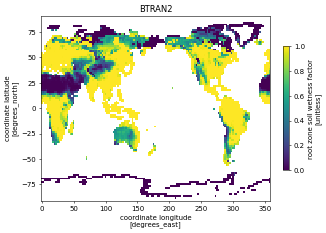

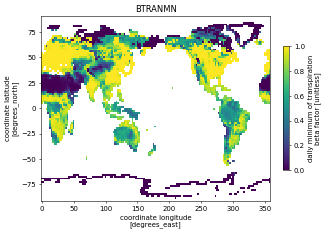

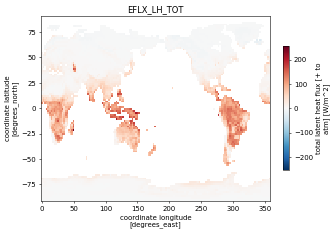

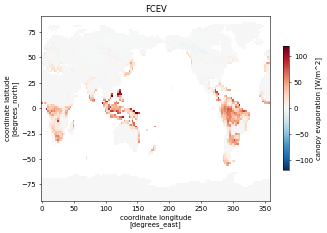

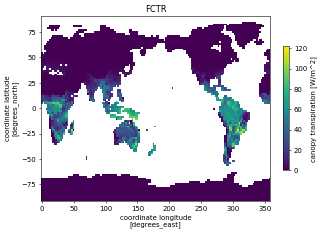

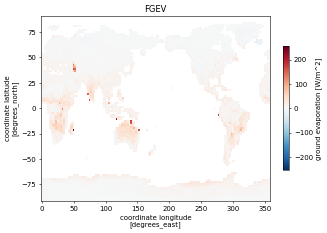

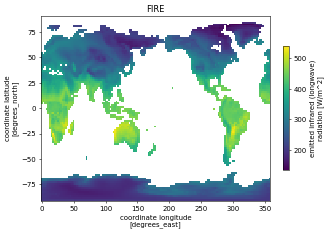

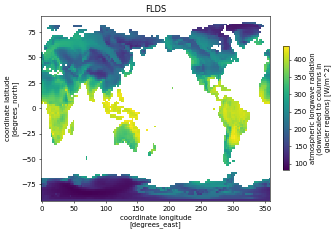

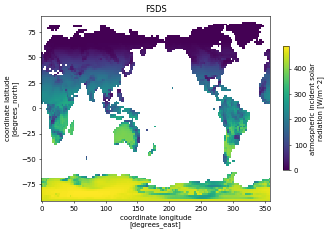

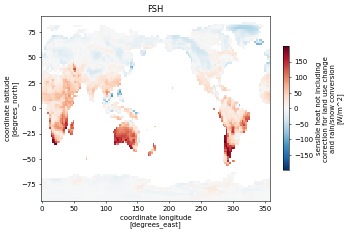

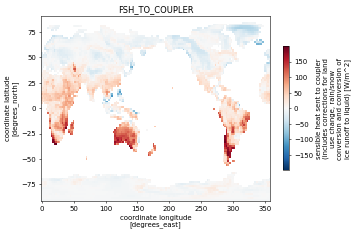

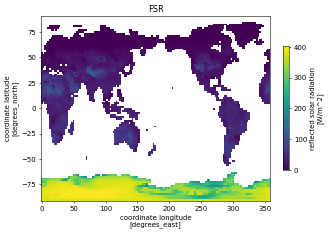

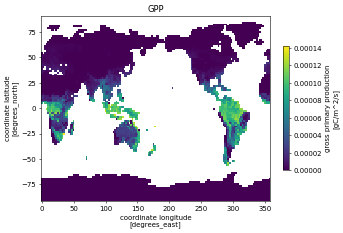

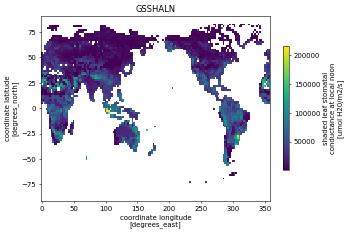

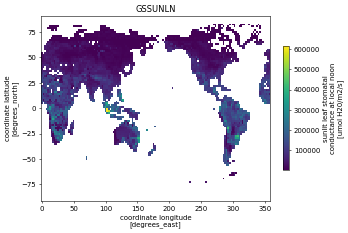

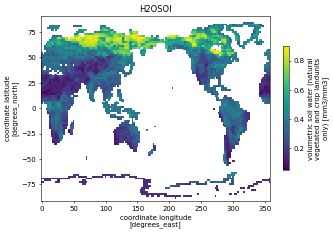

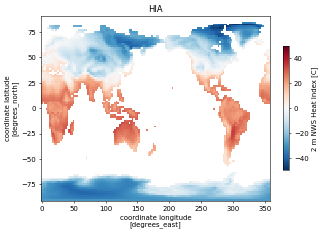

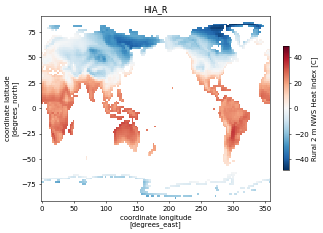

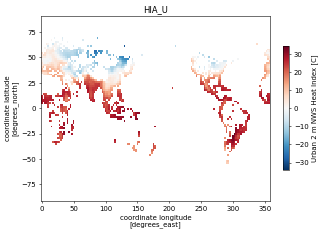

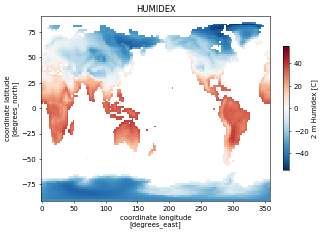

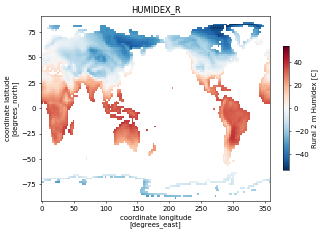

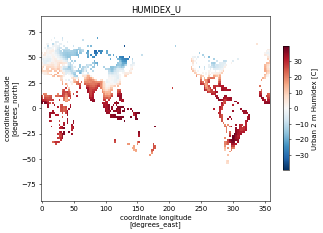

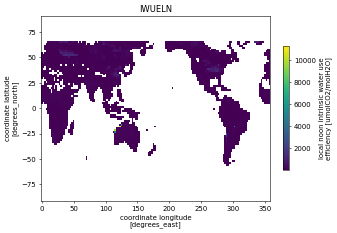

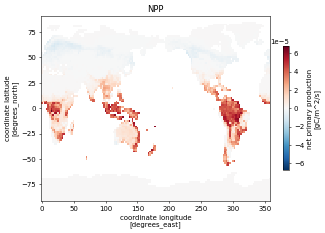

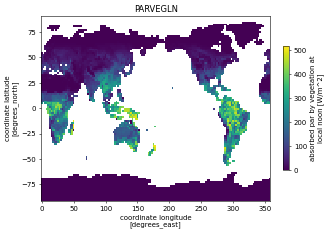

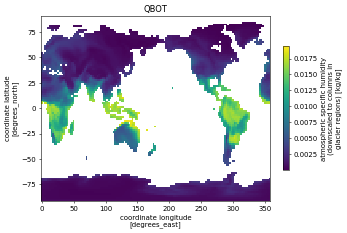

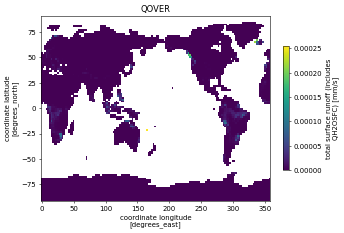

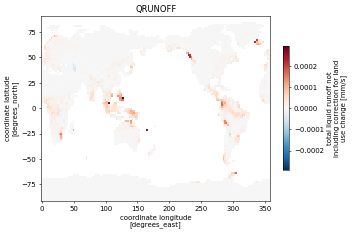

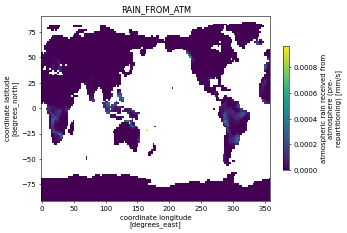

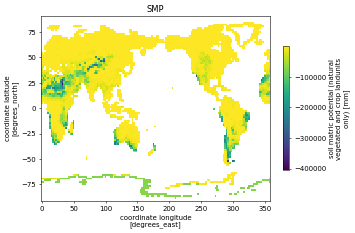

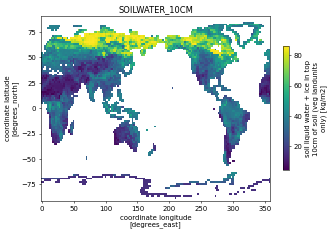

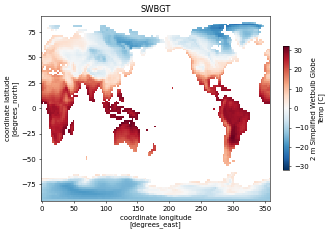

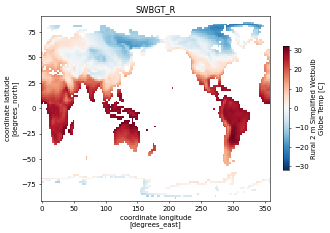

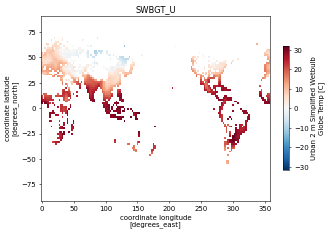

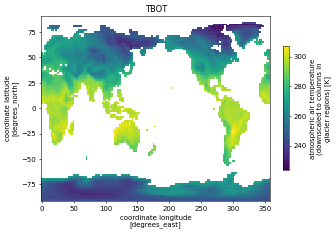

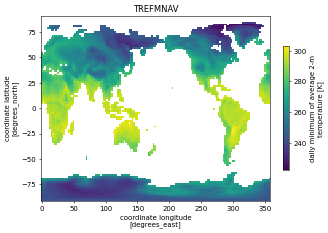

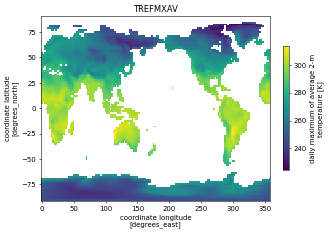

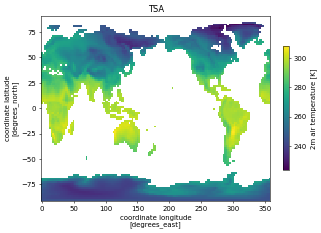

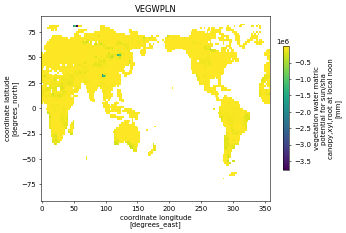

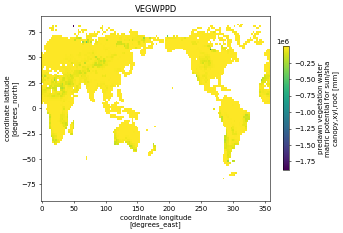

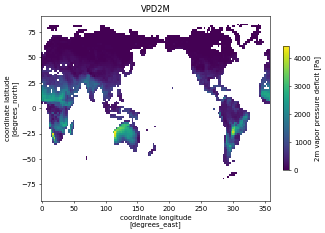

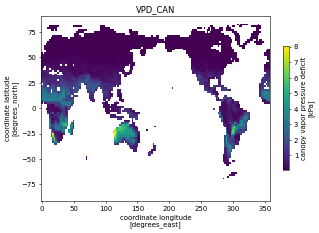

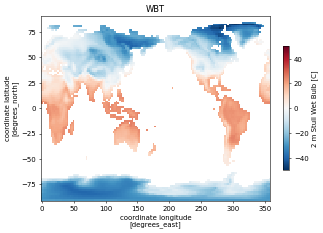

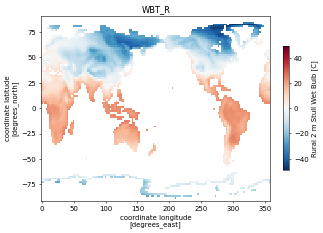

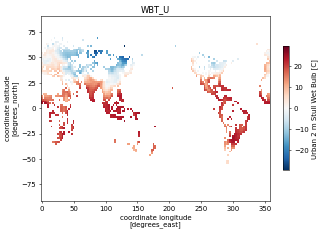

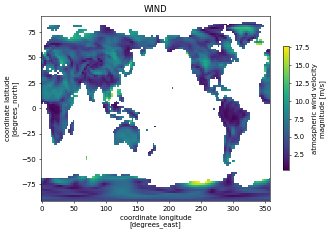

In [7]:
for v in lnd_h2.variables:
    if "lat" in lnd_h2[v].dims and "time" in lnd_h2[v].dims:
        plt.figure()

        if len(lnd_h2[v].dims) > 3:
            if "levgrnd" in lnd_h2[v].dims:
                lnd_h2[v].isel(time=0, levgrnd=3).plot(cbar_kwargs={"fraction":0.025})
            if "levsoi" in lnd_h2[v].dims:
                lnd_h2[v].isel(time=0, levsoi=3).plot(cbar_kwargs={"fraction":0.025})
            if "nvegwcs" in lnd_h2[v].dims:
                lnd_h2[v].isel(time=0, nvegwcs=3).plot(cbar_kwargs={"fraction":0.025})
        else:
            lnd_h2[v].isel(time=0).plot(cbar_kwargs={"fraction":0.025})

        plt.title(v)

## cam.h1

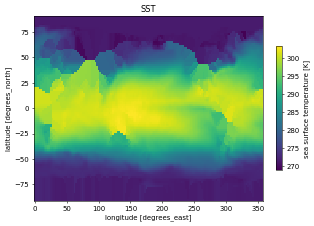

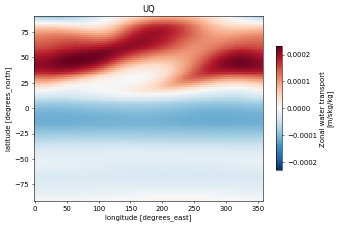

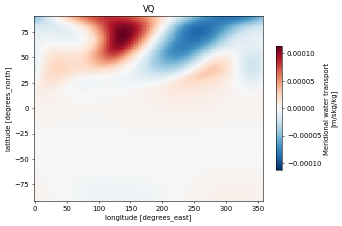

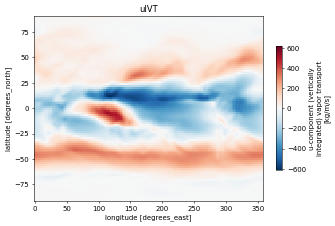

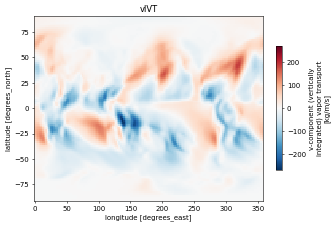

In [8]:
for v in atm_h1.variables:
    if "lat" in atm_h1[v].dims and "time" in atm_h1[v].dims:
        plt.figure()

        if len(atm_h1[v].dims) > 3:
            atm_h1[v].isel(time=0, lev=0).plot(cbar_kwargs={"fraction":0.025})
        else:
            atm_h1[v].isel(time=0).plot(cbar_kwargs={"fraction":0.025})

        plt.title(v)

## cam.h2

/glade/derecho/scratch/bbuchovecky/tmp/ipykernel_59253/877957656.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


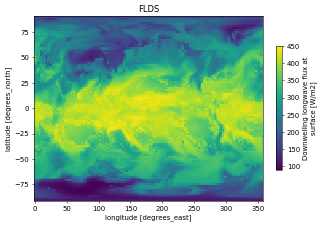

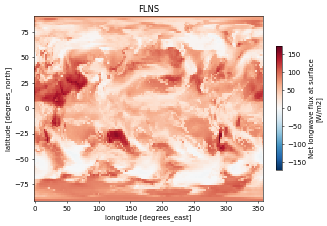

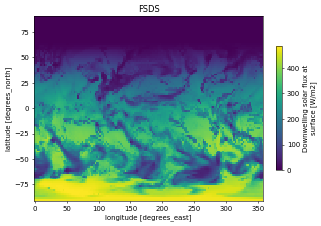

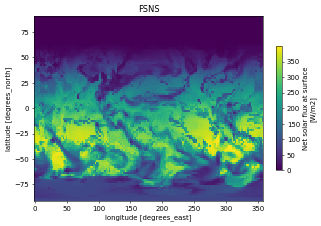

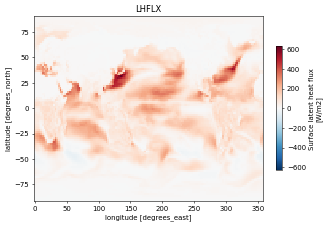

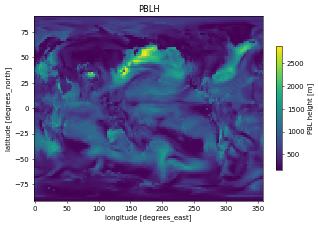

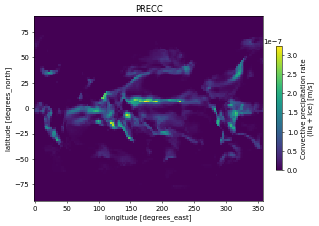

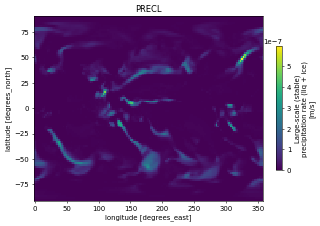

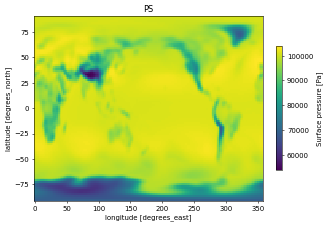

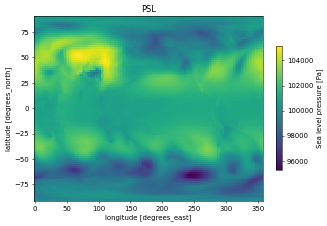

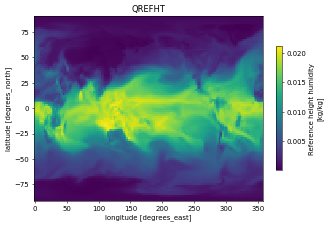

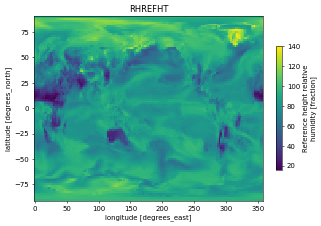

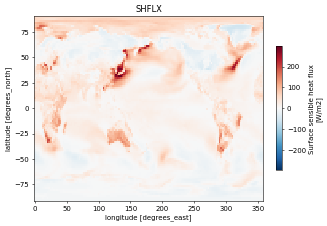

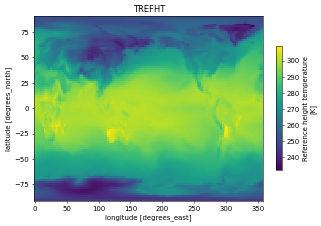

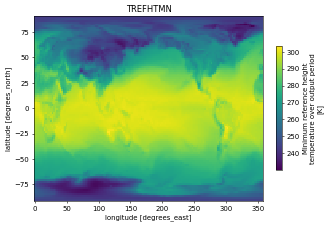

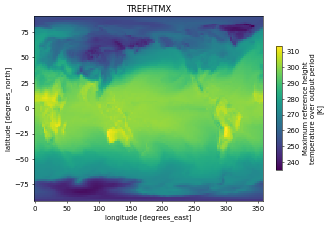

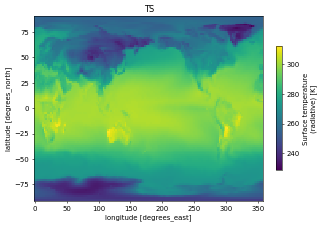

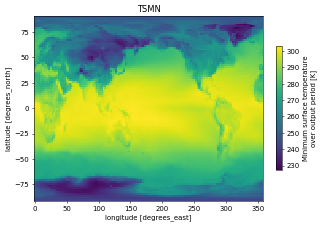

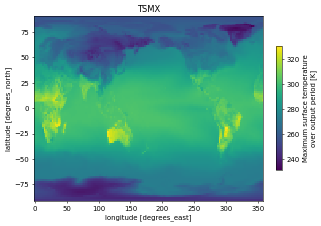

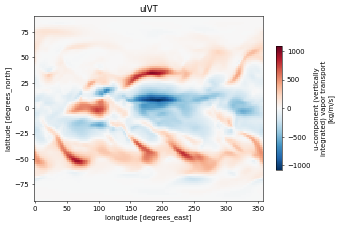

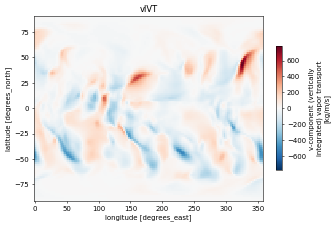

In [9]:
for v in atm_h2.variables:
    if "lat" in atm_h2[v].dims and "time" in atm_h2[v].dims:
        plt.figure()

        if len(atm_h2[v].dims) > 3:
            atm_h2[v].isel(time=1, lev=0).plot(cbar_kwargs={"fraction":0.025})
        else:
            atm_h2[v].isel(time=1).plot(cbar_kwargs={"fraction":0.025})

        plt.title(v)

# Compare output variables

In [19]:
indir = "/glade/derecho/scratch/bbuchovecky/archive"
case = "f.e22.FHIST_BGC.f19_f17_mg17.coupPPE-hist.000"

cam_h0 = xr.open_mfdataset(f"{indir}/{case}/atm/hist/{case}.cam.h0.1950-*.nc")
cam_h1 = xr.open_dataset(f"{indir}/{case}/atm/hist/{case}.cam.h1.1950-01.nc")
cam_h2 = xr.open_mfdataset(f"{indir}/{case}/atm/hist/{case}.cam.h2.1950-01-01-00000.nc")
cam_i = xr.open_dataset(f"{indir}/{case}/atm/hist/{case}.cam.i.1951-01-01-00000.nc")

clm_h0 = xr.open_dataset(f"{indir}/{case}/lnd/hist/{case}.clm2.h0.1950-02-01-00000.nc")
clm_h1 = xr.open_dataset(f"{indir}/{case}/lnd/hist/{case}.clm2.h1.1950-02-01-00000.nc")
clm_h2 = xr.open_dataset(f"{indir}/{case}/lnd/hist/{case}.clm2.h2.1950-01-01-00000.nc")

glc_h = xr.open_dataset(f"{indir}/{case}/glc/hist/{case}.cism.h.1951-01-01-00000.nc")
rof_h = xr.open_mfdataset(f"{indir}/{case}/rof/hist/{case}.mosart.h0.1950-*.nc")
ice_h = xr.open_mfdataset(f"{indir}/{case}/ice/hist/{case}.cice.h.1950-*.nc")

old_cam_h0 = xr.open_dataset("/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0001_PI_SOM_v02/atm/hist/COUP0001_PI_SOM_v02.cam.h0.0049-01.nc")
old_clm_h0 = xr.open_dataset("/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0001_PI_SOM_v02/lnd/hist/COUP0001_PI_SOM_v02.clm2.h0.0049-02-01-00000.nc")
old_clm_h0 = old_clm_h0.isel(time=slice(0,12))

/glade/derecho/scratch/bbuchovecky/tmp/ipykernel_59253/650910185.py:9: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  clm_h0 = xr.open_dataset(f"{indir}/{case}/lnd/hist/{case}.clm2.h0.1950-02-01-00000.nc")
/glade/derecho/scratch/bbuchovecky/tmp/ipykernel_59253/650910185.py:18: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  old_clm_h0 = xr.open_dataset("/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0001_PI_SOM_v02/lnd/hist/COUP0001_PI_SOM_v02.clm2.h0.0049-02-01-00000.nc")


In [20]:
print("variables in my CESM run that are not in Claire's CESM run:")

print("\nCLM - land")
print(set(clm_h0.variables) - set(old_clm_h0.variables))

print("\nCAM - atmosphere")
print(set(cam_h0.variables) - set(old_cam_h0.variables))

print("\nCISM - land ice")
print(set(glc_h.variables))

print("\nMOSART - river runoff")
print(set(rof_h.variables))

print("\nCICE - sea ice")
print(set(ice_h.variables))

variables in my CESM run that are not in Claire's CESM run:

CLM - land
{'LEAFC_TO_BIOFUELC', 'GRAINC', 'GRAINN', 'NFERTILIZATION', 'HBOT', 'CROPSEEDC_DEFICIT', 'LIVESTEMC_TO_BIOFUELC', 'GRAINC_TO_SEED', 'GRAINC_TO_FOOD', 'CPHASE'}

CAM - atmosphere
{'UT'}

CISM - land ice
{'y1', 'level', 'usurf', 'lithoz', 'topg', 'time', 'staglevel', 'x0', 'tstep_count', 'internal_time', 'stagwbndlevel', 'y0', 'smb', 'mapping', 'thk', 'x1', 'artm'}

MOSART - river runoff
{'mdcur', 'mcdate', 'lon', 'mcsec', 'TOTAL_DISCHARGE_TO_OCEAN_LIQ', 'areatotal2', 'area', 'mscur', 'RIVER_DISCHARGE_OVER_LAND_ICE', 'nstep', 'TOTAL_DISCHARGE_TO_OCEAN_ICE', 'DIRECT_DISCHARGE_TO_OCEAN_LIQ', 'time_written', 'areatotal', 'time', 'mask', 'time_bounds', 'lat', 'RIVER_DISCHARGE_OVER_LAND_LIQ', 'date_written', 'DIRECT_DISCHARGE_TO_OCEAN_ICE'}

CICE - sea ice
{'TLON', 'time', 'ULON', 'ULAT', 'snowfrac', 'tmask', 'TLAT', 'fswup', 'time_bounds'}


# Check CO2 mixing ratios

In [22]:
cam_h0

<xarray.Dataset> Size: 2GB
Dimensions:           (time: 12, lat: 96, lev: 32, ilev: 33, nbnd: 2, lon: 144)
Coordinates:
  * lat               (lat) float64 768B -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon               (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lev               (lev) float64 256B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev              (ilev) float64 264B 2.255 5.032 10.16 ... 985.1 1e+03
  * time              (time) object 96B 1950-02-01 00:00:00 ... 1951-01-01 00...
Dimensions without coordinates: nbnd
Data variables: (12/309)
    gw                (time, lat) float64 9kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    hyam              (time, lev) float64 3kB dask.array<chunksize=(1, 32), meta=np.ndarray>
    hybm              (time, lev) float64 3kB dask.array<chunksize=(1, 32), meta=np.ndarray>
    P0                (time) float64 96B 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai              (time, ilev) float64 3kB dask.array<chunksize=(1, 33), meta=np.ndarray>
    hybi              (time, ilev) float64 3kB dask.array<chunksize=(1, 33), meta=np.ndarray>
    ...                ...
    soa_a1_SRF        (time, lat, lon) float32 664kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2DDF         (time, lat, lon) float32 664kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2SFWET       (time, lat, lon) float32 664kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_a2_SRF        (time, lat, lon) float32 664kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c1SFWET       (time, lat, lon) float32 664kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    soa_c2SFWET       (time, lat, lon) float32 664kB dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes: (9)

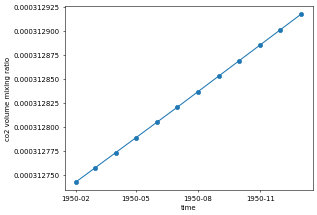

In [23]:
cam_h0.co2vmr.plot(marker="o")

# Compare DOCN (HadOIBl and hist output)

In [ ]:
sst = xr.open_dataset("/glade/campaign/cesm/cesmdata/inputdata/atm/cam/sst/sst_HadOIBl_bc_1.9x2.5_1850_2017_c180507.nc")
# sst

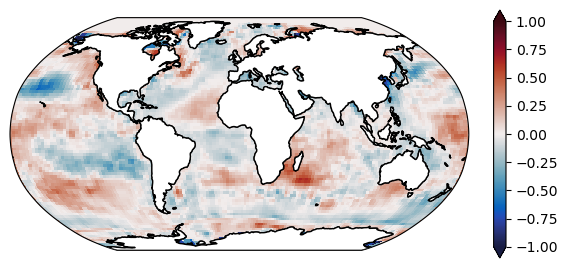

In [ ]:
data = (sst.SST_cpl.sel(time="1950-12-16").squeeze()+273.15).values - cam_h1.SST.squeeze().values

fig, ax = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})
pc = ax.pcolormesh(cam_h1.lon, cam_h1.lat, data, vmin=-1, vmax=1, cmap=cmo.balance, transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='k', facecolor="white")
ax.coastlines()
fig.colorbar(pc, ax=ax, fraction=0.025, extend="both")


# Check IVT calculation

In [ ]:
"""
Fortran sourcemod implementation:

!compute uq*dp/g and vq*dp/g
ftem4(:ncol,:) = state%q(:ncol,:,1) * state%u(:ncol,:) *state%pdel(:ncol,:) * rga
ftem5(:ncol,:) = state%q(:ncol,:,1) * state%v(:ncol,:) *state%pdel(:ncol,:) * rga

!integrate each component
do k=2,pver
    ftem4(:ncol,1) = ftem4(:ncol,1) + ftem4(:ncol,k)
    ftem5(:ncol,1) = ftem5(:ncol,1) + ftem5(:ncol,k)
end do
"""

# the following using output from a one day test run where I saved UQ

PS = cam_h1.PS
P0 = cam_h1.P0
hyam = cam_h1.hyam
hybm = cam_h1.hybm
hyai = cam_h1.hyai
hybi = cam_h1.hybi

pi = hyai * P0 + hybi * PS
pdel = pi.diff("ilev").rename({"ilev":"lev"})

UQ_pdel = xr.DataArray(
    data=cam_h1.UQ.transpose("time", "lev", "lat", "lon").values * pdel.transpose("time", "lev", "lat", "lon").values,
    coords=cam_h1.UQ.coords,
    dims=cam_h1.UQ.dims
)
calc_uIVT = (UQ_pdel / 9.81).sum(dim="lev")

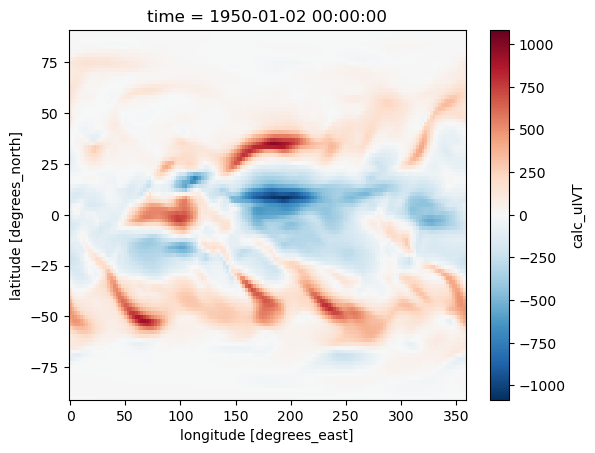

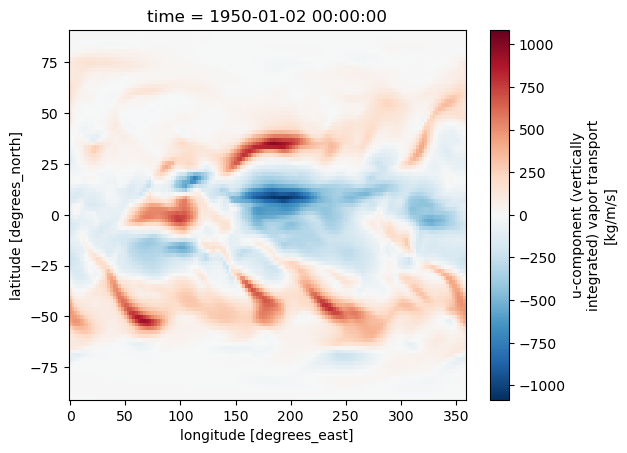

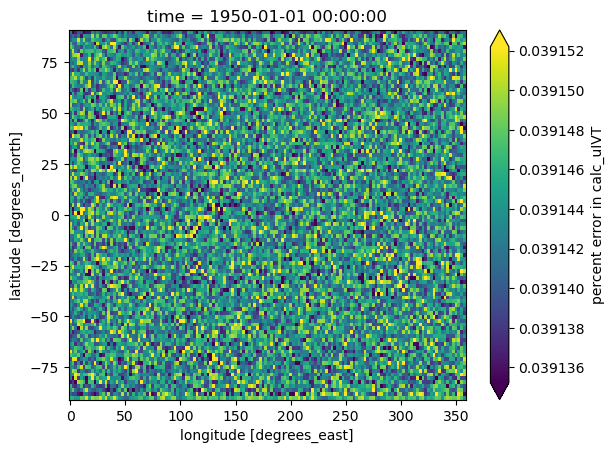

In [18]:
plt.figure()
calc_uIVT.isel(time=1).plot(cbar_kwargs={"label":"calc_uIVT"})

plt.figure()
cam_h1.uIVT.isel(time=1).plot()

plt.figure()
abs((calc_uIVT - cam_h1.uIVT) / cam_h1.uIVT * 100).isel(time=0).plot(robust=True, cbar_kwargs={"label":"percent error in calc_uIVT"})